# Introduction:
Time series is the series of data points indexed/ listed/ graphed in time order. 

### Time Series Analysis [TSA]:
It comprises methods for analyzing the time series data in order to extract meaningful statistics and other charateristics of the data. 

### Time Series Forecasting [TSF]:
It refers to the use of the time series model, to predict future values based on the past observed values.

### Note: 
1. TSA is widely used for non-stationary data [i.e. the mean, variance and covariances change over time]. For e.g. Stocks, weather, economics, retail sales

2. We are using a store's sales data [of 4 years] for TSA and TSF. We are interested only in the "furniture" sales. 

# Load the libraries

In [29]:
import warnings
warnings.filterwarnings("ignore")                                                         # To ignore the deprecation warnings 
import itertools
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import statsmodels.api as sm


# Load the data - Read the excel file using pandas read_excel()

In [30]:
df = pd.read_excel("SuperStores.xls")
df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


# Extract the furniture sales data


In [31]:
df_furniture = df.loc[df.Category == 'Furniture']
df_furniture


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
29,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


# View the shape of this DataFrame

In [32]:
df_furniture.shape                        # (2121, 21) ---> (Rows, columns)


(2121, 21)

# Lets determine the time span over which this data has been collected

In [33]:
# The earliest timestamp
print(df_furniture['Order Date'].min())                        # 2014-01-06 00:00:00

# The latest timestamp
print(df_furniture['Order Date'].max())                        # 2017-12-30 00:00:00

# Inference: We have a good over 3.5 years of data for the time series analysis


2014-01-06 00:00:00
2017-12-30 00:00:00


# Data preprocessing

### Pre-processing Step [1]
We have 21 columns..Not all columns are of use to us. Lets get rid of the unwanted columns. 

In [34]:
# First fetch the list of all columns
df_furniture.columns

# Create a list of columns you wish to drop
cols_to_be_dropped = ['Row ID', 'Order ID','Ship Date', 'Ship Mode','Customer ID', 'Customer Name', 'Segment', 'Country',\
                      'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',\
                      'Quantity', 'Discount', 'Profit']

# Drop the columns from the DataFame containing furniture sales data
df_furniture.drop(cols_to_be_dropped, axis=1, inplace=True)

# Sort the data, on the basis of the "Order Date"
df_furniture = df_furniture.sort_values('Order Date')

# View the data
df_furniture


,Order Date,Sales
7474,2014-01-06,2573.8200
7660,2014-01-07,76.7280
866,2014-01-10,51.9400
716,2014-01-11,9.9400
2978,2014-01-13,545.9400
4938,2014-01-13,333.9990
6474,2014-01-14,61.9600
970,2014-01-16,127.1040
5465,2014-01-19,181.4700
6327,2014-01-20,272.9400


### Pre-processing Step [2] - Check for the presence of missing values

In [35]:
df_furniture.isnull().sum()                     # Fortunately, we dont have any missing data

Order Date    0
Sales         0
dtype: int64

### Pre-processing Step [3] - Aggregate the sales made on the same date

In [36]:
df_furniture = df_furniture.groupby('Order Date')['Sales'].sum().reset_index()   

# Note: Repeated running the same code might throw error

In [37]:
df_furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
5,2014-01-14,61.9600
6,2014-01-16,127.1040
7,2014-01-19,181.4700
8,2014-01-20,1413.5100
9,2014-01-21,25.2480


# Index the time series data - i.e. use the "Order Date" column values as indexes/ row labels

In [38]:
df_furniture = df_furniture.set_index('Order Date')
df_furniture


,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
2014-01-14,61.9600
2014-01-16,127.1040
2014-01-19,181.4700
2014-01-20,1413.5100


# Streamline the dates:
### The current datetime data is not uniform and hence tricky to work with. We will therefore use the average of the daily sales value for that month and we will consider the start of each month. 

### Time series essentially is a sequence of data points taken at successively EQUALLY SPACED POINTS IN TIME.

In [39]:
df_furniture = df_furniture['Sales'].resample('MS').mean()    # MS = Monthly + Start of the Month


In [40]:
# Lets view the data for the year 2017
df_furniture['2017':]                               


Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

# Plot the data - Once the dates have been streamlined. 

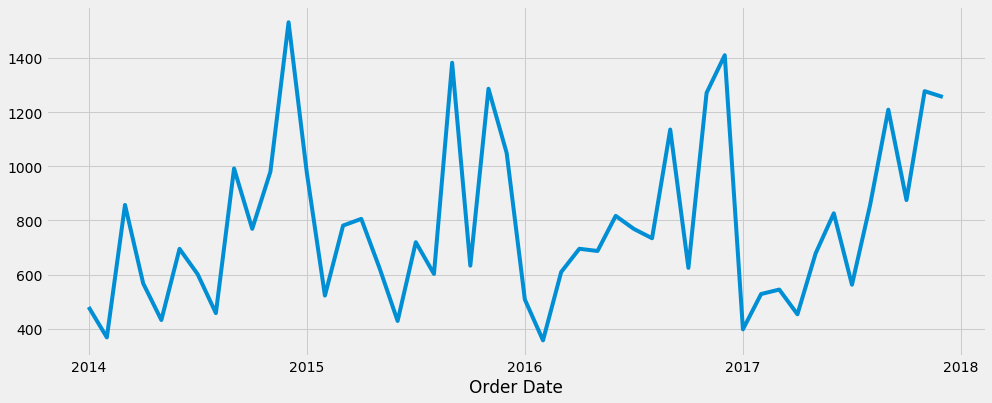

In [41]:
# Using the pandas wrapper for matplotlib for quick plots
df_furniture.plot(figsize=(15, 6))
plt.show()

# Inference:
    1. The time series curve shows that there is SEASONALITY PATTERN i.e. the sales are always LOW at the beginning of the 
       year and HIGH at the end of the year. 
       
    2. Within each single year, there is an UPWARD TREND, with a couple of low months in the mid of the year. 

# Lets plot again!
Using time series decomposition, we can view individual components of the time series viz...SEASONALITY + TREND + NOISE!!
We are using the ADDITIVE model. 

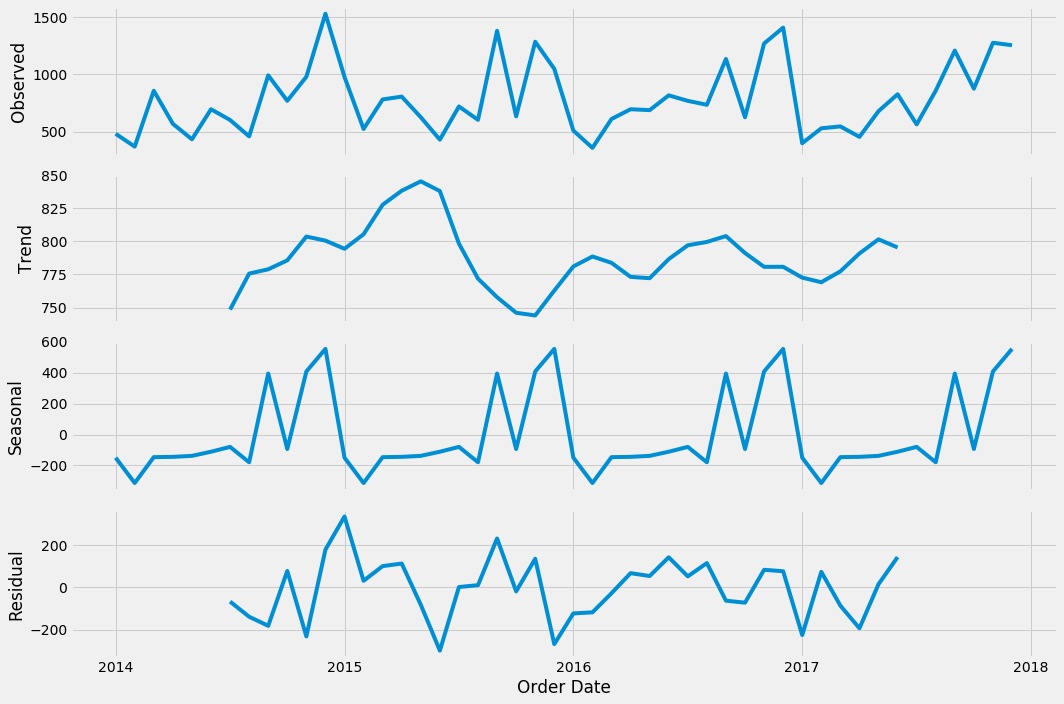

In [42]:
# Need to explicitly set the figure dimensions
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

decomposition = sm.tsa.seasonal_decompose(df_furniture, model='additive')
fig = decomposition.plot()
plt.show()

# Inference: 
This plot clearly shows that the sales of the furniture is unstable and has seasonality. 


# Time series forecasting with ARIMA

### ARIMA is one of the most commonly used technique in TSF. ARIMA is an acronym for Autoregressive Integrated Moving Average. ARIMA is composed of the AR + I + MA models. 

### ARIMA models are thus denoted by the notation ARIMA (p,d,q). These 3 parameters account for SEASONALITY , TREND and NOISE in the data. 
#### p: It is the AR term which refes to the number of past values to be considered for predicting the reset value. For e.g. if p =2 then y(t-2) and y(t-1) will be considered to predict the y(t). 

#### d: The integrated part of the model. Usually d = 1 = the difference in between the current value and the previous value. 

#### q: It is the MA term and is used to generate the error terms of the model. 

### SARIMA is a method similar to ARIMA that adds seasonality element to ARIMA. For SARIMA model, there's also (P,D,Q,S) parameters specified along with the (p,d,q). The P,D,Q values are similar to the parameters described above but it's applied to the seasonality component of the SARIMA model. S is the periodicity of the time series (4 for quarterly, 12 for yearly).

In [44]:
# Create 3 iterables/ lists
p = d = q = range(0,2)
print(p)
print(d)
print(q)

# Generate order - i.e. all possible combinations of 3 variables - using cartseian product.
arima_pdq = list(itertools.product(p,d,q))                      # Multiplicative decomposition model               
print(arima_pdq)                                                # itertools.product returns Cartesian Product of the input iterables.  

# Generate seasonal order
sarima_pdqs = [(x[0], x[1], x[2], 12) for x in arima_pdq]
print(sarima_pdqs)

# Theory:
# order: The (p,d,q) order of the model, refers to the AR, differences(I) and MA parameters. Default is AR(1) model i.e (1,0,0).
# seasonal_order: The (P,D,Q,s) order of the seasonal component of the model, refers to the AR, differences(I), MA and periodicity.
#                 Here s refers to the periodicity [i.e. number of periods in the season] Its value is 4 - Quaterly data and 
#                 12-Monthly data. Default is 0 i.e. No seasonal effect. 

range(0, 2)
range(0, 2)
range(0, 2)
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


# Optimal Parameter selection for the furniture sales data - using GRID SEARCH process with AIC minimization. 


## Grid searching is a process of scanning the data to configure optimal parameters for a given model. Grid search can be applied to varied ML algorithms, in order to determine the best parameters for the model. Grid search can be computationally expensive as it builds a model for each parameter combination and stores this model for future comparison. 
####  Refer: https://medium.com/@elutins/grid-searching-in-machine-learning-quick-explanation-and-python-implementation-550552200596

In [45]:
for i in arima_pdq:
    for j in sarima_pdqs:
        try:
            model = sm.tsa.statespace.SARIMAX(df_furniture, 
                                              order = i, 
                                              seasonal_order = j,
                                              enforce_stationarity = False, 
                                              enforce_invertibility = False
                                             )
            results = model.fit()
            print('ARIMA{} x {} - AIC:{}'.format(i,j, results.aic))
        except:
            continue

'''
Theory:
    1. order - Iterable which specifies (p,d,q) order of model which corresponds to the AR Parameters,differences & MA parameters. 
            Default order is AR(1) or ARIMA(1,0,0). 
            
    2. seasonal_order - Iterable which specifies the (p,d,q,s) order of the seasonal component of the model which corresponds to 
            AR, differences, MA and periodicity parameters respectively. s is periodicity == No. of periods in the season. 
            s=4 (Quarterly data) or s=12 (Monthly data). 
    
    3. enforce_stationarity - Boolean parameter to enforce stationarity in the AR(Auto-regressive) component of the model. 
            Default: True. 
            
    4. enforce_invertibility - Boolean parameter to enforce invertibility in the MA(Moving-Average) component of the model. 
            Default: True.  
            An invertible MA model is one that can be written as an infinite order AR model that converges so that the 
            AR coefficients converge to 0 as we move infinitely back in time. i.e. Converrting an MA(1) = AR(Infinite). 
'''

ARIMA(0, 0, 0) x (0, 0, 0, 12) - AIC:769.0817523205916
ARIMA(0, 0, 0) x (0, 0, 1, 12) - AIC:1446.5593227130305
ARIMA(0, 0, 0) x (0, 1, 0, 12) - AIC:477.7170130920218
ARIMA(0, 0, 0) x (1, 0, 0, 12) - AIC:497.23144334183365
ARIMA(0, 0, 0) x (1, 0, 1, 12) - AIC:1172.208674145885
ARIMA(0, 0, 0) x (1, 1, 0, 12) - AIC:318.0047199116341
ARIMA(0, 0, 1) x (0, 0, 0, 12) - AIC:720.9252270758095
ARIMA(0, 0, 1) x (0, 0, 1, 12) - AIC:2900.357535652858
ARIMA(0, 0, 1) x (0, 1, 0, 12) - AIC:466.56074298091255
ARIMA(0, 0, 1) x (1, 0, 0, 12) - AIC:499.574045803366
ARIMA(0, 0, 1) x (1, 0, 1, 12) - AIC:2513.1394870316744
ARIMA(0, 0, 1) x (1, 1, 0, 12) - AIC:319.98848769468657
ARIMA(0, 1, 0) x (0, 0, 0, 12) - AIC:677.894766843944
ARIMA(0, 1, 0) x (0, 0, 1, 12) - AIC:1250.2320272227237
ARIMA(0, 1, 0) x (0, 1, 0, 12) - AIC:486.63785672282035
ARIMA(0, 1, 0) x (1, 0, 0, 12) - AIC:497.78896630044073
ARIMA(0, 1, 0) x (1, 0, 1, 12) - AIC:1550.2003231687213
ARIMA(0, 1, 0) x (1, 1, 0, 12) - AIC:319.7714068109211
ARI

'\nTheory:\n    1. order - Iterable which specifies (p,d,q) order of model which corresponds to the AR Parameters,differences & MA parameters. \n            Default order is AR(1) or ARIMA(1,0,0). \n            \n    2. seasonal_order - Iterable which specifies the (p,d,q,s) order of the seasonal component of the model which corresponds to \n            AR, differences, MA and periodicity parameters respectively. s is periodicity == No. of periods in the season. \n            s=4 (Quarterly data) or s=12 (Monthly data). \n    \n    3. enforce_stationarity - Boolean parameter to enforce stationarity in the AR(Auto-regressive) component of the model. \n            Default: True. \n            \n    4. enforce_invertibility - Boolean parameter to enforce invertibility in the MA(Moving-Average) component of the model. \n            Default: True.  \n            An invertible MA model is one that can be written as an infinite order AR model that converges so that the \n            AR coeffi

# Inference: 
## The ARIMA(1, 1, 1) x (1, 1, 0, 12) yields the lowest AIC:297.79. Therefore this is the optimal parameter combination.

# Fitting the ARIMA model

In [46]:
model_final = sm.tsa.statespace.SARIMAX(df_furniture, 
                                        order = (1,1,1), 
                                        seasonal_order = (1,1,0,12), 
                                        enforce_stationarity = False, 
                                        enforce_invertibility = False)


results = model_final.fit()             # Fits the model by maximum likelihood
print(results.summary())
print()
print()
print()
print(results.summary().tables[1])


                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -144.894
Date:                            Sat, 19 Jan 2019   AIC                            297.788
Time:                                    17:03:30   BIC                            302.152
Sample:                                01-01-2014   HQIC                           298.816
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360   

# Run model diagnosics to investigate unusual behaviour

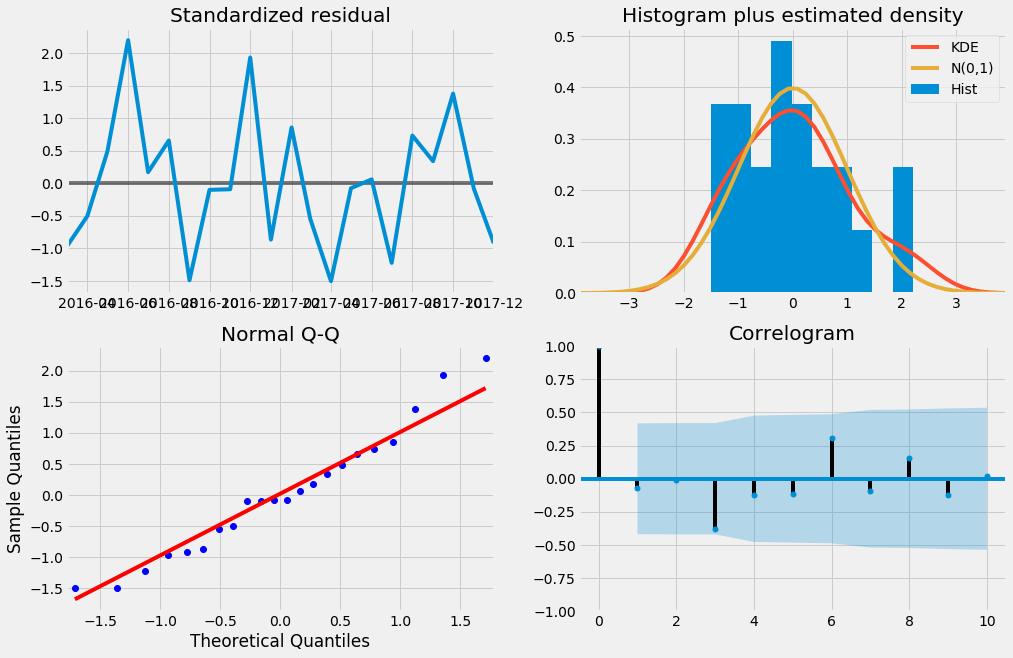

In [47]:
results.plot_diagnostics(figsize=(15,10))
plt.show()

# Inference:
1. Standardized residual plot seems to be stationary with mean ~ 0. We need to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

2. The Histogram is the most common way to make sense of DISCRETE data. Though we have only a few discrete data points, we pretend that we have some sort of continuous distribution. The KDE [Kernel Density Estimate] are the generalization and improvement over hisograms. The KDE helps us to visualize the 'shape' of the data in continuous form, unlike the discrete histogram.  The KDE closely follows the Standard Normal Distribution Curve.This is a good indication that the residuals are normally distributed

3. QQ Plots show the ordered distribution of the residuals here. A linear trend indicates that the residuals are normally distributed. 

4. The autocorrelation plot/ Correlogram indicate that the time series residuals have low correlation. The  residuals over time display no obvious seasonality and appear to be white noise. 

These observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

# Validating forecasts:
In order to determine the forecast accuracy, we compare the predicted sales (generated by the model) with the real sales of the time series. We take into consideration the time series corresponding to the period: 2017-01-01 till the end of the data

We use the get_prediction() and conf_int() which allows us to obtain the values and the associated confidence intervals respectively, of the forecast. 


In [48]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic=False)   # Determine the predicted value
print(pred.predicted_mean)                                                           # View the predicted values [we have predicted only for 2017] 

pred_confInterval = pred.conf_int()                                                  # Determine the confidence interval
print(pred_confInterval)                                                             # Here the "Order Date" is Datetime Index- 
                                                                                     # A pre-requisite for TSA. 
                                                                                     # The lower and upper sales bounds will be used in plotting.   
# Check the index
print(pred_confInterval.index)

Order Date
2017-01-01     550.097508
2017-02-01     376.885904
2017-03-01     640.883952
2017-04-01     717.477893
2017-05-01     691.390255
2017-06-01     815.731465
2017-07-01     776.952238
2017-08-01     729.181939
2017-09-01    1149.878805
2017-10-01     633.943071
2017-11-01    1291.341635
2017-12-01    1417.169001
Freq: MS, dtype: float64
            lower Sales  upper Sales
Order Date                          
2017-01-01   204.676595   895.518420
2017-02-01    31.859289   721.912519
2017-03-01   296.216074   985.551830
2017-04-01   373.137795  1061.817990
2017-05-01   347.350822  1035.429687
2017-06-01   471.968814  1159.494117
2017-07-01   433.445222  1120.459254
2017-08-01   385.911746  1072.452132
2017-09-01   806.828626  1492.928984
2017-10-01   291.097825   976.788316
2017-11-01   948.687741  1633.995529
2017-12-01  1074.694185  1759.643817
DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-

In [49]:
# NOTE: The "dynamic=False" ensures that the forecast at each point takes into consideration, the full history upto that point. 

# Plot the real and the forecasted value of the sales time series, to assess how well we did. 

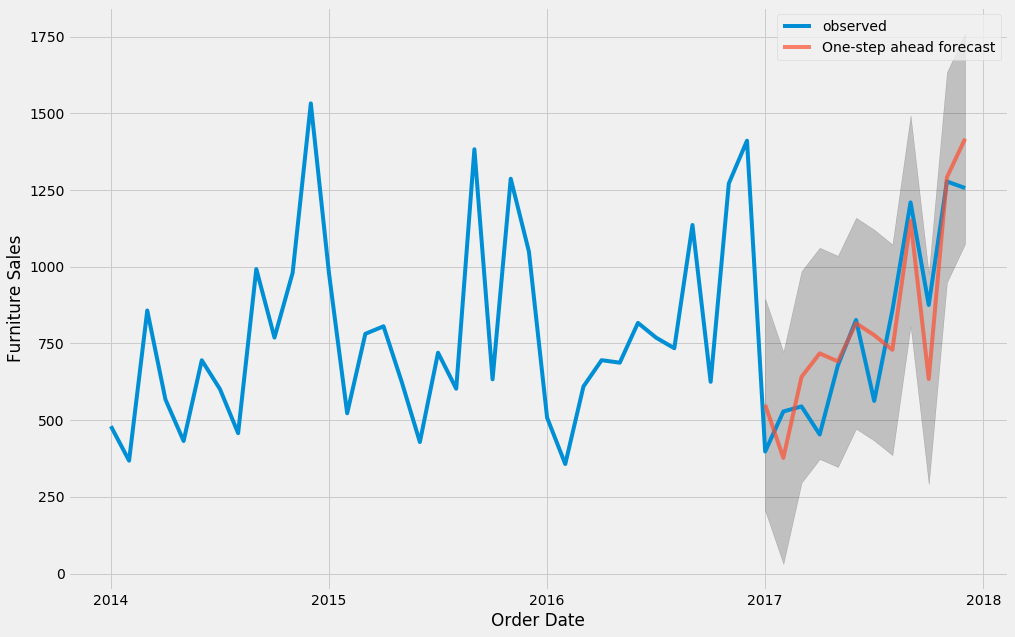

In [50]:
ax = df_furniture['2014':].plot(label="observed")                     # The blue plot of the observed/ known time series 
pred.predicted_mean.plot(ax = ax,                                     # the red plot of predicted time series.
                         label = "One-step ahead forecast", 
                         alpha = 0.7, 
                         figsize = (15,10))

ax.fill_between(x = pred_confInterval.index,                             
                y1 = pred_confInterval.iloc[:, 0], 
                y2 = pred_confInterval.iloc[:, 1], color='k', alpha=0.2
               )
# Details:  
#          fill_between() is used to fill the area between 2 horizontal curves.
#          x = x coordinate of the nodes defining the curve
#         y1 = y coordinate of the nodes defining the first curve [original time series plot]
#         y2 = y coordinate of the nodes defining the second curve [predicted time series plot]

ax.set_xlabel('Order Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


# Inference:
1. Overall the forecasts allign themselves very well with the true values.
2. It shows an UPWARD TREND
3. It also captured the SEASONALITY i.e. the Sales is low at the start of the year and then increases by the year end. 

# Forecast Accuracy measurements: 
Numerous measures are present to measure the forecast accuracy:

    Forecast Error = Actual Value - Forecast Value     [Analogous to residuals in Regression Analysis]
    
1. MAE [Mean Absolute Error] = Average of the absolute value of the forecast errors. 

2. MSE [Mean Square Error] = Average of the sum of the squared forecast errors.

3. RMSE [Root Mean Square Error]

4. MAPE [Mean Absolute Percentage Error] 

In [51]:
# MAE & MSE
df_furniture_predicted_2017 = pred.predicted_mean                                  # We predicted values only after 01 Jan, 2017.
print("Predicted Values:------------>", df_furniture_predicted_2017)               # pandas Series  

df_furniture_Original_2017 = df_furniture['2017-01-01':]
print("\nOriginal Values:------------->", df_furniture_Original_2017)              # pandas Series  


mae =  ((df_furniture_Original_2017 - df_furniture_predicted_2017).abs().mean())   # pandas Series.abs() determines the absolute value  
print("\nMean Absolute Error [MAE] of the forecast is:------->", mae)              # 125.54739118827685

mse = ((df_furniture_Original_2017 - df_furniture_predicted_2017)**2).mean()
print("\nMean Square Error [MSE] of the forecast is:------->", mse)                # 22993.57843213686

rmse = np.sqrt(mse)
print("\nRoot Mean Square Error [RMSE] of the forecast is:------->", rmse)         # 151.63633612078888

# Inference: Both MAE and MSE solve the issue of positive and negative forecast errors offsetting each other. 
# Both MAE and MSE depend on the scale of data. Thus it is difficult to make comparisons for different time periods i.e. 
# Comparing a method of forecasting monthly furniture sales to the method of forecasting daily furniture sales. 
# MSE should be as low as possible. Smaller the MSE, closer is the line of best fit. 
# RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in 
# the same units as the response variable. Lower values of RMSE indicate better fit. 
# If MSE = RMSE = 0...indicates a perfect model with no errors. 

Predicted Values:------------> Order Date
2017-01-01     550.097508
2017-02-01     376.885904
2017-03-01     640.883952
2017-04-01     717.477893
2017-05-01     691.390255
2017-06-01     815.731465
2017-07-01     776.952238
2017-08-01     729.181939
2017-09-01    1149.878805
2017-10-01     633.943071
2017-11-01    1291.341635
2017-12-01    1417.169001
Freq: MS, dtype: float64

Original Values:-------------> Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

Mean Absolute Error [MAE] of the forecast is:-------> 125.54739118827685

Mean Square Error [MSE] of the forecast is:-------> 22993.57843213686

Root Mean Square Error [RMSE] of the forecast is:-------> 151.63633612078888


# Producing and Visualizing forecasts
Leverage our SARIMA [Seasonal ARIMA] model to forecast future values. We use the get_forecast() to get future values for the specified number of steps ahead. 

In [52]:
# Get forecast 100 steps ahead in future
df_furniture_pred_100 = results.get_forecast(steps=100)                 # We generated predicted values from 2018 till 2026. 
print(df_furniture_pred_100.predicted_mean)                             # View the predicted values

# Get confidence intervals of forecasts
df_furniture_pred_100_confInterval = df_furniture_pred_100.conf_int()
print("\n\n", df_furniture_pred_100_confInterval)


2018-01-01     408.746291
2018-02-01     534.435811
2018-03-01     556.940913
2018-04-01     470.052148
2018-05-01     689.155356
2018-06-01     836.844678
2018-07-01     578.371220
2018-08-01     865.379752
2018-09-01    1218.272671
2018-10-01     879.647718
2018-11-01    1288.280038
2018-12-01    1270.833965
2019-01-01     419.090310
2019-02-01     544.903573
2019-03-01     567.256466
2019-04-01     480.254148
2019-05-01     699.506745
2019-06-01     847.207931
2019-07-01     588.596204
2019-08-01     875.816077
2019-09-01    1228.676942
2019-10-01     890.165377
2019-11-01    1298.641319
2019-12-01    1281.092137
2020-01-01     429.454584
2020-02-01     555.264715
2020-03-01     577.621461
2020-04-01     490.622018
2020-05-01     709.870833
2020-06-01     857.571719
                 ...     
2023-11-01    1340.096479
2023-12-01    1322.549843
2024-01-01     470.909670
2024-02-01     596.719878
2024-03-01     619.076529
2024-04-01     532.077015
2024-05-01     751.325924
2024-06-01  

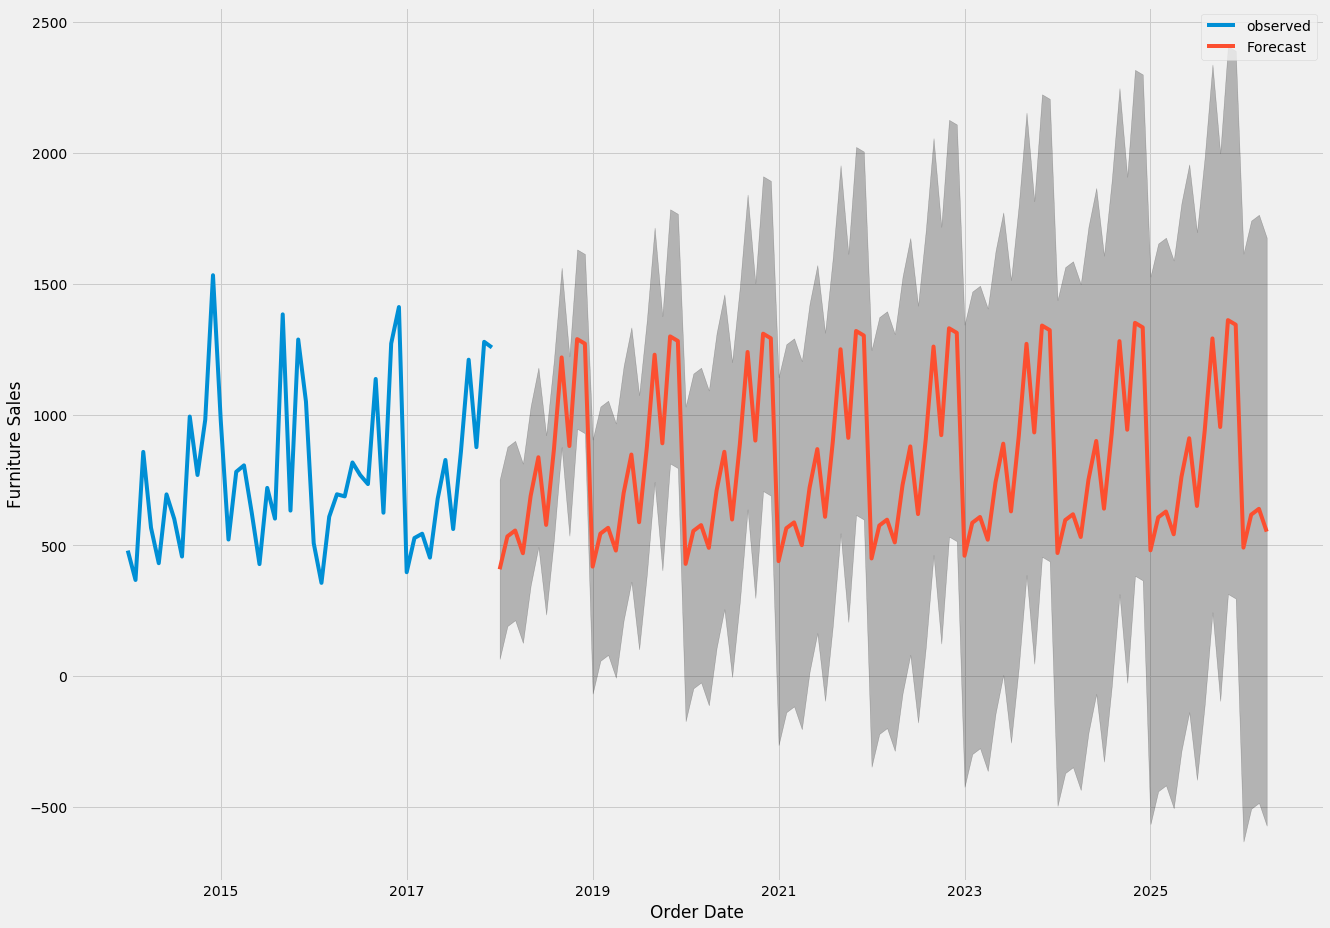

In [53]:
# Plot it the same way
ax = df_furniture.plot(label='observed', figsize=(20, 15))
df_furniture_pred_100.predicted_mean.plot(ax=ax, 
                                          label = 'Forecast')

ax.fill_between(df_furniture_pred_100_confInterval.index, 
                df_furniture_pred_100_confInterval.iloc[:, 0], 
                df_furniture_pred_100_confInterval.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Order Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# Inference: 
### Our model clearly captured furniture sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

# Conclusion:
### We could experiment further by:
1. Changing the start date of the dynamic forecast. 
2. Instead of the AIC measure to find the best model, we can select another metric to select the best mode. For e.g. MSE

#### Reference: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3#step-5-